<a href="https://colab.research.google.com/github/fukudashota1117/sample/blob/main/50m%E8%B5%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://api.e-stat.go.jp/rest/3.0/app/json/getStatsData?cdCat03=180&cdTime=2017100000&appId=e2108f4278034897f79e7e221d84167df71313c9&lang=J&statsDataId=0003288734&metaGetFlg=Y&cntGetFlg=N&explanationGetFlg=Y&annotationGetFlg=Y&sectionHeaderFlg=1&replaceSpChars=0
{'GET_STATS_DATA': {'RESULT': {'STATUS': 0, 'ERROR_MSG': '正常に終了しました。', 'DATE': '2022-07-14T17:40:58.536+09:00'}, 'PARAMETER': {'LANG': 'J', 'STATS_DATA_ID': '0003288734', 'NARROWING_COND': {'CODE_CAT03_SELECT': 180, 'CODE_TIME_SELECT': 2017100000}, 'DATA_FORMAT': 'J', 'START_POSITION': 1, 'METAGET_FLG': 'Y', 'EXPLANATION_GET_FLG': 'Y', 'ANNOTATION_GET_FLG': 'Y', 'REPLACE_SP_CHARS': 0, 'CNT_GET_FLG': 'N', 'SECTION_HEADER_FLG': 1}, 'STATISTICAL_DATA': {'RESULT_INF': {'TOTAL_NUMBER': 138, 'FROM_NUMBER': 1, 'TO_NUMBER': 138}, 'TABLE_INF': {'@id': '0003288734', 'STAT_NAME': {'@code': '00402102', '$': '体力・運動能力調査'}, 'GOV_ORG': {'@code': '00402', '$': 'スポーツ庁'}, 'STATISTICS_NAME': '体力・運動能力調査', 'TITLE': {'@no': '1', '$': '年齢別テストの結果 年齢別テスト

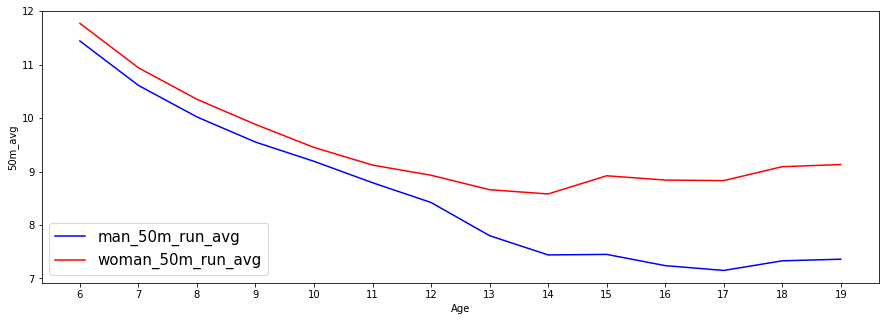

In [ ]:
import requests #HTTPメソッドを実行するライブラリー
import json 
import numpy as np 
import matplotlib.pyplot as plt 
import pprint #改行ライブラリー

appId = "e2108f4278034897f79e7e221d84167df71313c9"

#統計データ取得のAPIエンドポイント http(s)://api.e-stat.go.jp/rest/<バージョン>/app/json/getStatsData?<パラメータ群>
url = "http://api.e-stat.go.jp/rest/3.0/app/json/getStatsData?cdCat03=180&cdTime=2017100000"

#設定するパラメータ
param = {
    "appId"            : appId,
    "lang"             : "J",
    "statsDataId"      : "0003288734", #ここにチームで決めた統計Idを当てはめる
    "metaGetFlg"       : "Y",
    "cntGetFlg"        : "N",
    "explanationGetFlg" : "Y",
    "annotationGetFlg" : "Y",
    "sectionHeaderFlg" : "1",
    "replaceSpChars" : 0
}
response = requests.get(url, params = param) #response.get(url, クエリパラメータ)でgetメソッドを実行
data = json.loads(response.text)
json = json.dumps(data, indent= 2, ensure_ascii=False) #改行してみやすく整理
print(response.url) #urlを取得
print(data)#JSON形式でレスポンスを取得
values = data['GET_STATS_DATA']['STATISTICAL_DATA']['DATA_INF']['VALUE'] #必要なデータを保持しているvalueまでアクセスをして格納
print(values)
#配列を用意
x_m = [] #男性の年齢
y_m = [] #男性の平均値
x_w=[]#女性の年齢
y_w=[]#女性の平均値

#cat02が性別(100:男性, 110:女性) cat03,cat04で50m走の平均値を取得,$の欠損値を除外
for value in values: #先程格納したvaluesをループ
  #男性の50m走平均値を取得
  if value["@cat02"] == "100" and value["@cat03"] == "180" and value["@tab"] == "00110" and value["$"]!="…": 
    y_m.append(float(value["$"])) 
  #女性の50m走平均値を取得
  elif value["@cat02"] == "110" and value["@cat03"] == "180" and value["@tab"] == "00110" and value["$"]!="…":
    y_w.append(float(value["$"]))
#xリストに6歳から19歳の年齢を追加(文字列)
for i in range(6,20):
    x_m.append(str(i))
    x_w.append(str(i))
  
print(x_m)
print(y_m)
print(x_w)
print(y_w)
plt.figure(figsize=(15,5))#表示サイズの設定
plt.plot(x_m, y_m, color="b", label="man_50m_run_avg") #男性の５０m走平均 格納した配列をplot(x軸(リスト1), y軸(リスト2))で添付
plt.plot(x_w, y_w, color="r", label="woman_50m_run_avg") #女性の５０m走平均
plt.xlabel("Age")
plt.ylabel("50m_avg")
plt.legend(loc="lower left", fontsize=15) #凡例表示

plt.show()


